# Import Dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

# Load Dataset

Sumber dataset: https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud/metadata

In [3]:
url = 'dataset/data.csv'
data = pd.read_csv(url)
data =  pd.DataFrame(data)
print("data terdiri dari {} baris dan {} kolom".format(data.shape[0], data.shape[1]))

data terdiri dari 1000000 baris dan 8 kolom


In [4]:
data.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


# EDA


## Data Description

Penjelasan Fitur:
- distance_from_home : jarak dari rumah ke tempat dimana transaksi dilakukan
- distance_from_last_transaction : jarak dari tempat terakhir dilakukannya transaksi
- ratio_to_median_purchase_price : rasio transaksi dengan median harga beli
- repeat_retailer : apakah transaksi terjadi dari retail yang sama
- used_chip : apakah transaksi melalui chip (credit card)
- used_pin_number : apakah transaksi tersebut menggunakan nomor pin
- online_order : apakah transaksi tersebut merupakan pesanan online
- fraud : apakah transaksi tersebut termasuk penipuan (fraud)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [6]:
data.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


## Handle Noise Data

### Missing Values

Mengecek duplikasi data

In [7]:
if data.duplicated().sum() > 0:
  print('Terdapat redundansi')
else:
  print('Tidak terdapat redundansi')

Tidak terdapat redundansi


Mengecek apakah ada nilai null

In [8]:
print('Jumlah missing value adalah :', data.isnull().sum().sum())

Jumlah missing value adalah : 0


In [9]:
boolean_features = ["repeat_retailer", "used_chip", "used_pin_number", "online_order", "fraud"]

In [10]:
for feature in boolean_features:
  print("unique values from: {}".format(feature))
  print(data[feature].unique())

unique values from: repeat_retailer
[1. 0.]
unique values from: used_chip
[1. 0.]
unique values from: used_pin_number
[0. 1.]
unique values from: online_order
[0. 1.]
unique values from: fraud
[0. 1.]


## Univariate

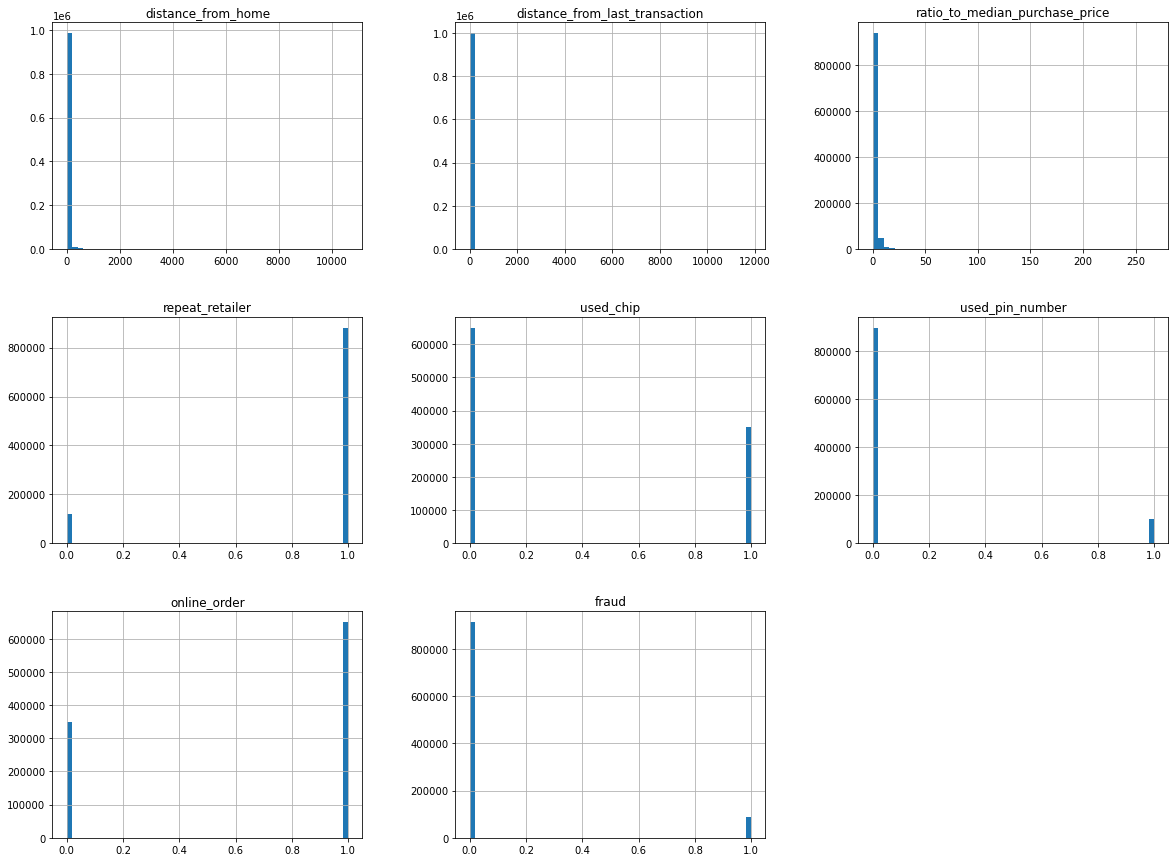

In [11]:
data.hist(bins=50, figsize=(20,15))
plt.show()

In [12]:
fraud_0 = (data['fraud'] == 0).sum()
fraud_1 = (data['fraud'] == 1).sum()
print("jumlah fitur fraud bernilai 0 adalah {} dengan persentase {}%".format(fraud_0, (fraud_0/data.shape[0])*100))
print("jumlah fitur fraud bernilai 1 adalah {} dengan persentase {}%".format(fraud_1, (fraud_1/data.shape[0])*100))

jumlah fitur fraud bernilai 0 adalah 912597 dengan persentase 91.2597%
jumlah fitur fraud bernilai 1 adalah 87403 dengan persentase 8.7403%


train_test_split

In [13]:
from sklearn.model_selection import train_test_split

X = data.drop('fraud', axis=1)
y = data['fraud']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
train_unique_label, train_counts_label = np.unique(y_train, return_counts=True)
test_unique_label, test_counts_label = np.unique(y_test, return_counts=True)

In [15]:
print('Label Distributions: \n')
print(train_counts_label/ len(y_train))
print(test_counts_label/ len(y_test))

Label Distributions: 

[0.91255 0.08745]
[0.912785 0.087215]


## Undersampling

In [16]:
df = data.sample(frac=1)

In [17]:
fraud_df = df.loc[df['fraud'] == 1]
non_fraud_df = df.loc[df['fraud'] == 0][:fraud_1]

In [18]:
normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

In [19]:
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
774685,19.750143,0.990296,4.508711,1.0,0.0,0.0,1.0,1.0
876249,1.396110,6.625153,8.460729,0.0,0.0,0.0,1.0,1.0
31733,31.709546,0.287368,0.367101,1.0,0.0,0.0,1.0,0.0
136997,5.232670,0.781087,0.068395,1.0,0.0,0.0,0.0,0.0
748250,29.868369,8.430066,0.626067,1.0,1.0,1.0,0.0,0.0


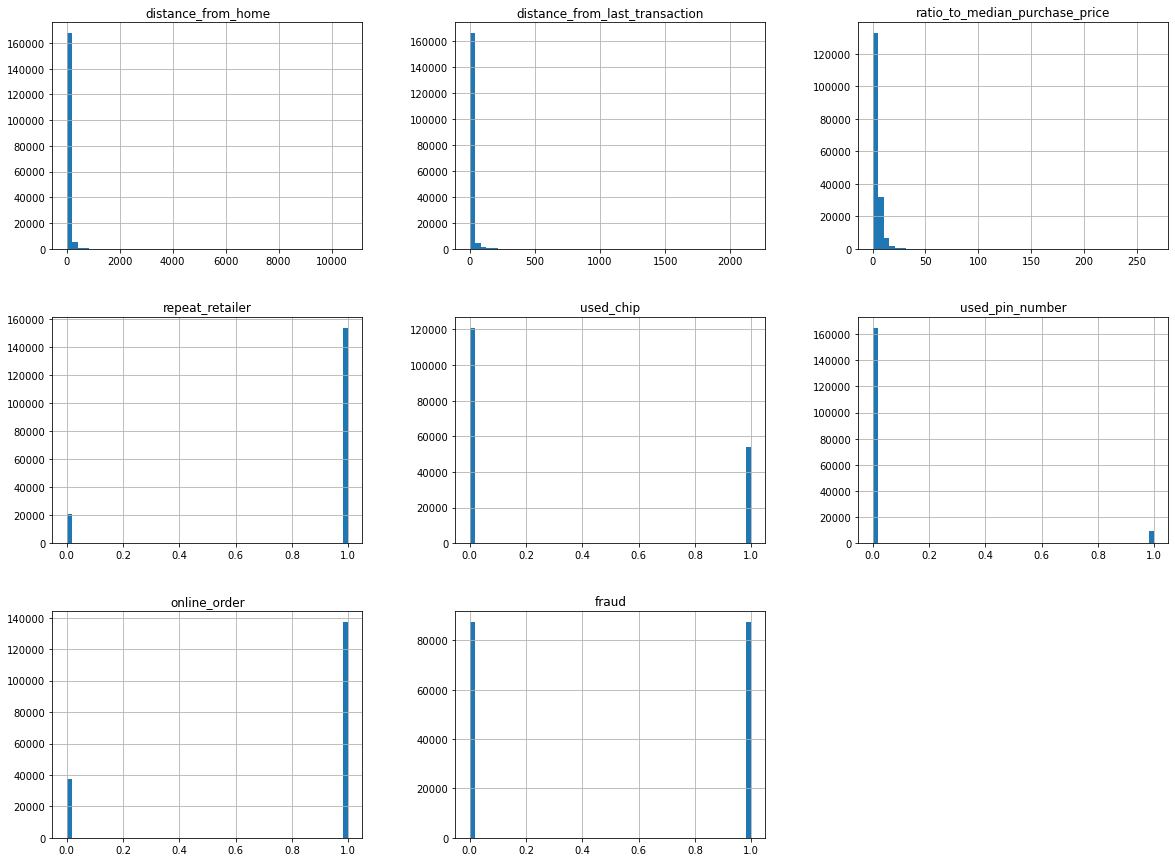

In [20]:
new_df.hist(bins=50, figsize=(20,15))
plt.show()

## Handle Outlier

In [21]:
data_numeric = ["distance_from_home", "distance_from_last_transaction", "ratio_to_median_purchase_price"]

<AxesSubplot:xlabel='distance_from_home'>

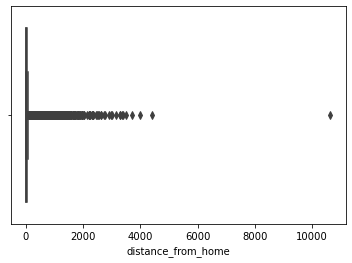

In [22]:
sns.boxplot(x = new_df["distance_from_home"])

<AxesSubplot:xlabel='distance_from_last_transaction'>

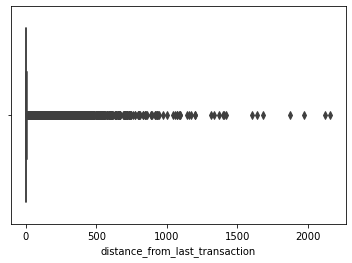

In [23]:
sns.boxplot(x = new_df["distance_from_last_transaction"])

<AxesSubplot:xlabel='ratio_to_median_purchase_price'>

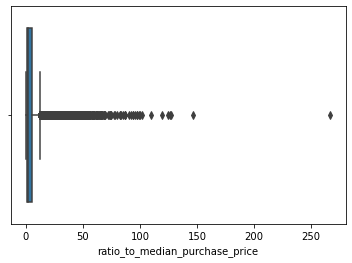

In [24]:
sns.boxplot(x = new_df["ratio_to_median_purchase_price"])

In [25]:
Q1 = new_df.quantile(0)
Q3 = new_df.quantile(0.99)
IQR=Q3-Q1
new_df=new_df[~((new_df<(Q1-1.5*IQR))|(new_df>(Q3+1.5*IQR))).any(axis=1)]
 
# Cek ukuran dataset setelah kita drop outliers
new_df.shape

(174154, 8)

## Multivariate

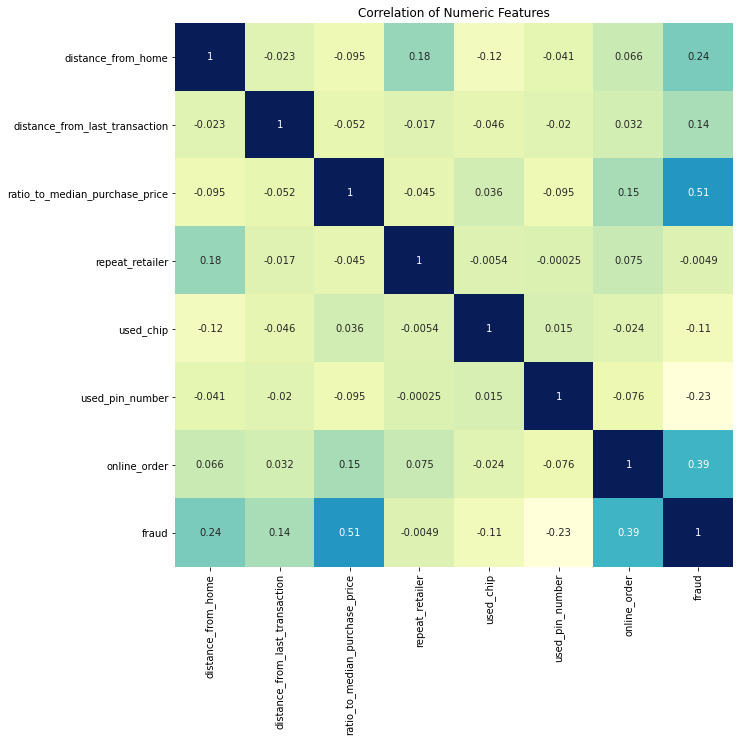

In [26]:
plt.figure(figsize=(10, 10))

sns.heatmap(new_df.select_dtypes(np.number).corr(), 
            annot=True,
            cbar=False,
            cmap="YlGnBu",
            xticklabels=new_df.select_dtypes(np.number).columns,
            yticklabels=new_df.select_dtypes(np.number).columns)
plt.title('Correlation of Numeric Features')
plt.show()

In [27]:
new_df.drop(['repeat_retailer'], inplace=True, axis=1)
new_df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,used_chip,used_pin_number,online_order,fraud
774685,19.750143,0.990296,4.508711,0.0,0.0,1.0,1.0
876249,1.396110,6.625153,8.460729,0.0,0.0,1.0,1.0
31733,31.709546,0.287368,0.367101,0.0,0.0,1.0,0.0
136997,5.232670,0.781087,0.068395,0.0,0.0,0.0,0.0
748250,29.868369,8.430066,0.626067,1.0,1.0,0.0,0.0


# Data Preparation

## train_test_split

In [28]:
from sklearn.model_selection import train_test_split

new_X = new_df.drop('fraud', axis=1)
new_y = new_df['fraud']

new_x_train, new_x_test, new_y_train, new_y_test = train_test_split(new_X, new_y, test_size=0.2, random_state=42)

In [29]:
print(f'Total # of sample in train dataset: {len(new_x_train)}')
print(f'Total # of sample in test dataset: {len(new_x_test)}')

Total # of sample in train dataset: 139323
Total # of sample in test dataset: 34831


## Stardardization

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(new_x_train)
new_x_train = scaler.transform(new_x_train)
new_x_test = scaler.transform(new_x_test)

# Modeling

- Naive Bayes
- Logistic Regression

## Naive Bayes

In [31]:
from sklearn.naive_bayes import GaussianNB

bayes = GaussianNB()
bayes.fit(new_x_train, new_y_train)
model_bayes = bayes.predict(new_x_test)

## Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
 
lr = LogisticRegression(random_state=0).fit(new_x_train, new_y_train)
model_lr = lr.predict(new_x_test)

# Evaluation

In [33]:
from sklearn.metrics import precision_score, \
    recall_score, classification_report, \
    accuracy_score, f1_score, ConfusionMatrixDisplay

def evaluate_classifier_performance(classifier, prediction, y_test = new_y_test):
    print("Hasil Evaluasi:\n\n%s\n" % (classification_report(y_test, classifier.predict(new_x_test))))

    print('Accuracy:', accuracy_score(y_test, prediction))
    print('Precision Macro Average:', precision_score(y_test, prediction, average='macro'))
    print('Precision Micro Average:', precision_score(y_test, prediction, average='micro'))
    print('Recall Macro Average:', recall_score(y_test, prediction, average='macro'))
    print('Recall Micro Average:', recall_score(y_test, prediction, average='micro'))
    print('F1 Macro Average:', f1_score(y_test, prediction, average='macro'))
    print('F1 Micro Average:', f1_score(y_test, prediction, average='micro'))

    print("\n\nConfusion Matrix\n")
    ConfusionMatrixDisplay.from_estimator(classifier, new_x_test, new_y_test)

Hasil Evaluasi:

              precision    recall  f1-score   support

         0.0       0.96      0.88      0.92     17479
         1.0       0.89      0.97      0.93     17352

    accuracy                           0.92     34831
   macro avg       0.93      0.92      0.92     34831
weighted avg       0.93      0.92      0.92     34831


Accuracy: 0.922253165283799
Precision Macro Average: 0.9257011370486854
Precision Micro Average: 0.922253165283799
Recall Macro Average: 0.9224189969147196
Recall Micro Average: 0.922253165283799
F1 Macro Average: 0.9221150053439073
F1 Micro Average: 0.922253165283799


Confusion Matrix



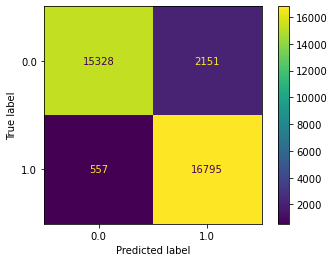

In [34]:
evaluate_classifier_performance(bayes, model_bayes)

Hasil Evaluasi:

              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94     17479
         1.0       0.93      0.95      0.94     17352

    accuracy                           0.94     34831
   macro avg       0.94      0.94      0.94     34831
weighted avg       0.94      0.94      0.94     34831


Accuracy: 0.943527317619362
Precision Macro Average: 0.9437101010971196
Precision Micro Average: 0.943527317619362
Recall Macro Average: 0.943566660549862
Recall Micro Average: 0.943527317619362
F1 Macro Average: 0.9435242668461689
F1 Micro Average: 0.943527317619362


Confusion Matrix



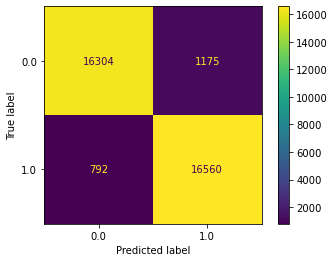

In [35]:
evaluate_classifier_performance(lr, model_lr)